Clustering and K-Means
=====

Most of the code contained within this notebook is from Ch. 19 of *Data Science from Scratch* by J. Grus.



In [3]:
# Implementation of a k-means clustering algorithm

from __future__ import division
import math, random
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

def distance(v, w):
   return math.sqrt(squared_distance(v, w))

def squared_distance(v, w):
    return sum_of_squares(vector_subtract(v, w))

def distance(v, w):
   return math.sqrt(squared_distance(v, w))

def vector_subtract(v, w):
    """subtracts two vectors componentwise"""
    return [v_i - w_i for v_i, w_i in zip(v,w)]

def dot(v, w):
    """v_1 * w_1 + ... + v_n * w_n"""
    return sum(v_i * w_i for v_i, w_i in zip(v, w))

def sum_of_squares(v):
    """v_1 * v_1 + ... + v_n * v_n"""
    return dot(v, v)

def squared_distance(v, w):
    return sum_of_squares(vector_subtract(v, w))

# this isn't right if you don't from __future__ import division
def vector_mean(vectors):
    """compute the vector whose i-th element is the mean of the
    i-th elements of the input vectors"""
    n = len(vectors)
    return scalar_multiply(1/n, vector_sum(vectors))

def vector_sum(vectors):
    return reduce(vector_add, vectors)

def scalar_multiply(c, v):
    return [c * v_i for v_i in v]

def vector_add(v, w):
    """adds two vectors componentwise"""
    return [v_i + w_i for v_i, w_i in zip(v,w)]

class KMeans:
    """performs k-means clustering"""

    def __init__(self, k):
        self.k = k          # number of clusters
        self.means = None   # means of clusters
        
    def classify(self, input):
        """return the index of the cluster closest to the input"""
        return min(range(self.k),
                   key=lambda i: squared_distance(input, self.means[i]))
                   
    def train(self, inputs):
    
        self.means = random.sample(inputs, self.k)
        assignments = None
        
        while True:
            # Find new assignments
            new_assignments = map(self.classify, inputs)

            # If no assignments have changed, we're done.
            if assignments == new_assignments:                
                return

            # Otherwise keep the new assignments,
            assignments = new_assignments    

            for i in range(self.k):
                i_points = [p for p, a in zip(inputs, assignments) if a == i]
                # avoid divide-by-zero if i_points is empty
                if i_points:                                
                    self.means[i] = vector_mean(i_points)  
                    
def squared_clustering_errors(inputs, k):
    """finds the total squared error from k-means clustering the inputs"""
    clusterer = KMeans(k)
    clusterer.train(inputs)
    means = clusterer.means
    assignments = map(clusterer.classify, inputs)
    
    return sum(squared_distance(input,means[cluster])
               for input, cluster in zip(inputs, assignments))

def plot_squared_clustering_errors(plt):

    ks = range(1, len(inputs) + 1)
    errors = [squared_clustering_errors(inputs, k) for k in ks]

    plt.plot(ks, errors)
    plt.xticks(ks)
    plt.xlabel("k")
    plt.ylabel("total squared error")
    plt.show()

Apply the k-means algorithm to some sample data. 

3-means:
[[-43.800000000000004, 5.4], [-15.888888888888888, -10.333333333333332], [18.333333333333332, 19.833333333333332]]

2-means:
[[-25.857142857142854, -4.714285714285714], [18.333333333333332, 19.833333333333332]]

Cluster for [10,10] 1
Cluster for [30,-10] 0


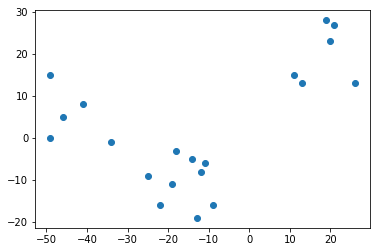

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt

inputs = [[-14,-5],[13,13],[20,23],[-19,-11],[-9,-16],[21,27],[-49,15],[26,13],[-46,5],[-34,-1],[11,15],[-49,0],[-22,-16],[19,28],[-12,-8],[-13,-19],[-41,8],[-11,-6],[-25,-9],[-18,-3]]

# Plot the points
plt.scatter(zip(*inputs)[0], zip(*inputs)[1])

random.seed(0) # To ensure repeatability
clusterer = KMeans(3)
clusterer.train(inputs)
print "3-means:"
print clusterer.means
print

random.seed(0)
clusterer = KMeans(2)
clusterer.train(inputs)
print "2-means:"
print clusterer.means
print

# Take addtional points and assign to a cluster ...
print "Cluster for [10,10]", clusterer.classify([10,10])
print "Cluster for [30,-10]", clusterer.classify([-30, -10])

Let's look at the error by number of clusters ...

In [5]:
print "errors as a function of k"

for k in range(1, len(inputs) + 1):
    print k, squared_clustering_errors(inputs, k)
print


errors as a function of k
1 15241.35
2 4508.73809524
3 1209.05555556
4 1075.38888889
5 853.916666667
6 709.666666667
7 532.392857143
8 416.833333333
9 345.083333333
10 353.75
11 232.083333333
12 151.0
13 63.3333333333
14 88.25
15 114.0
16 42.0
17 29.5
18 37.0
19 8.5
20 0.0



The following example is adapted from a Kaggle tutorial available [here](https://www.kaggle.com/tonzowonzo/simple-k-means-clustering-on-the-iris-dataset).  It makes use of the [k-means classifer from sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html).

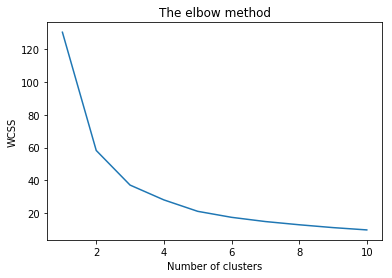

In [6]:
from sklearn import datasets
# import some data to play with

iris = datasets.load_iris()
X = iris.data[:, :2]

#Finding the optimum number of clusters for k-means classification
from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    
#Plotting the results onto a line graph, allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()

In [7]:
#Applying kmeans to the dataset / Creating the kmeans classifier
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(X)


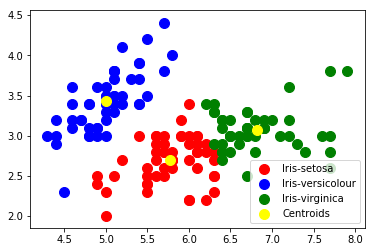

In [8]:
#Visualising the clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'yellow', label = 'Centroids')

plt.legend()